In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

# File to Load
data_to_load = Path("Resources/Real_Estate_data.csv")

# Read Real Estate Data File and store into Pandas DataFrames
real_estate_data_df = pd.read_csv(data_to_load, low_memory=False)

# view the data
real_estate_data_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
0,2001,3/14/2002,East Haven,111 PROSPECT RD,84630,10000,8.463000,NaN,NaN,POINT (-72.87317 41.27318),130157,-72.8731,41.2731
1,2001,10/3/2001,Clinton,1 W WOODS DR,137100,260000,0.527308,NaN,NaN,POINT (-72.50679 41.28246),130158,-72.5067,41.2824
2,2001,10/31/2001,Middletown,148-150 WASHINGTON ST,131110,230000,0.570043,NaN,NaN,POINT (-72.65351 41.56143),130159,-72.6535,41.5614
3,2001,9/27/2002,Danbury,2 QUAIL RUN DR,200100,435000,0.460000,NaN,NaN,POINT (-73.50208 41.3951),130160,-73.5020,41.3951
4,2001,7/18/2002,Hartford,104-106 EDWARDS ST,61810,19500,3.169744,NaN,NaN,POINT (-72.68094 41.7755),130161,-72.6809,41.7755


In [2]:
#Filter Data to have just five most populated towns in CT "Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"

narrow_df = real_estate_data_df[real_estate_data_df['Town'].isin(["Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"])]
narrow_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
4,2001,7/18/2002,Hartford,104-106 EDWARDS ST,61810,19500,3.169744,NaN,NaN,POINT (-72.68094 41.7755),130161,-72.6809,41.7755
8,2001,6/21/2002,Hartford,17-19 EARLE ST,3360,10000,0.336000,NaN,NaN,POINT (-72.67124 41.79073),130165,-72.6712,41.7907
11,2001,5/30/2002,Bridgeport,652-654 MAPLE ST,38360,100000,0.383600,NaN,NaN,POINT (-73.17707 41.18811),130168,-73.1770,41.1881
14,2001,6/4/2002,Bridgeport,295 HANOVER ST,37660,60000,0.627667,NaN,NaN,POINT (-73.20239 41.17155),130171,-73.2023,41.1715
20,2001,4/8/2002,Bridgeport,246C PENNSYLVANIA AVE,19950,48410,0.412105,NaN,NaN,POINT (-73.17443 41.20893),130177,-73.1744,41.2089


In [3]:
narrow_df['List Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [4]:
# Filter out rows where the Year is between 2001 and 2005 (inclusive)
df_filtered = narrow_df[~narrow_df['List Year'].between(2001, 2005)]

In [5]:
df_filtered.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63477,2006,8/9/2007,Bridgeport,307 GOLDEN HL ST,277521,325000,0.853911,NaN,NaN,POINT (-73.19296 41.17964),190639,-73.1929,41.1796
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555


In [6]:
#checking empty rows
df_filtered["Residential Type"].unique()

array(['Single Family', nan, 'Two Family', 'Condo', 'Three Family',
       'Four Family'], dtype=object)

In [7]:
#Filtering empty rows of data
df_filtered_1 = df_filtered.dropna(subset=['Residential Type'])
df_filtered_1["Residential Type"].unique()

array(['Single Family', 'Two Family', 'Condo', 'Three Family',
       'Four Family'], dtype=object)

In [8]:
df_filtered_2 = df_filtered_1.dropna(subset=['Residential Type'])
df_filtered_2["Residential Type"].unique()

array(['Single Family', 'Two Family', 'Condo', 'Three Family',
       'Four Family'], dtype=object)

In [9]:
# Counting the number of properties listed for each Residential type
property_counts = df_filtered_2["Residential Type"].value_counts()
property_counts

Residential Type
Single Family    13121
Condo             7306
Two Family        3434
Three Family      2942
Four Family        375
Name: count, dtype: int64

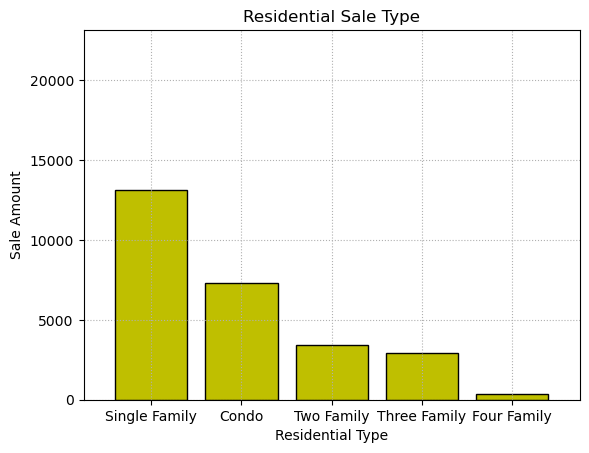

In [10]:
# bar plot setup
x_axis = property_counts.index
edgecolor = 'black'
plt.bar(x_axis, property_counts, color="y", align="center", ec=edgecolor)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(property_counts)+10000)
plt.title("Residential Sale Type")
plt.grid(True,linestyle=':', alpha=1)
plt.xlabel("Residential Type")
plt.ylabel("Sale Amount")

plt.show()

In [11]:
# Creating a dataframe
clean_df = pd.DataFrame(df_filtered_2)
clean_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555
63529,2006,5/1/2007,Bridgeport,80 CARTRIGHT ST PC,61296,180000,0.340533,Condo,Condo,POINT (-73.2189 41.17882),190750,-73.2189,41.1788


In [12]:
# Remove rows with NaN values
clean_df = clean_df.dropna(subset=['Longitude', 'Latitude', 'Sale Amount', 'Town'])

# Ensure 'Longitude', 'Latitude', and 'Sale Amount' are numeric
clean_df['Longitude'] = pd.to_numeric(clean_df['Longitude'], errors='coerce')
clean_df['Latitude'] = pd.to_numeric(clean_df['Latitude'], errors='coerce')
clean_df['Sale Amount'] = pd.to_numeric(clean_df['Sale Amount'], errors='coerce')

# Remove rows where conversion to numeric resulted in NaN
clean_df = clean_df.dropna(subset=['Longitude', 'Latitude', 'Sale Amount'])
clean_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555
63529,2006,5/1/2007,Bridgeport,80 CARTRIGHT ST PC,61296,180000,0.340533,Condo,Condo,POINT (-73.2189 41.17882),190750,-73.2189,41.1788


In [13]:
# pushing the changes to a new dataframe
rs_data_df = pd.DataFrame(clean_df)
rs_data_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
63470,2006,4/4/2007,Bridgeport,3380 E MAIN ST,135801,294000,0.461908,Single Family,Single Family,POINT (-73.17675 41.22032),190624,-73.1767,41.2203
63483,2006,12/26/2006,Bridgeport,582 WILLIAM ST 584,42560,378000,0.112593,Two Family,Two Family,POINT (-73.18544 41.19226),190655,-73.1854,41.1922
63525,2006,3/16/2007,Bridgeport,2370 NORTH AVE UT 12F,59099,175000,0.337709,Condo,Condo,POINT (-73.21628 41.17892),190739,-73.2162,41.1789
63526,2006,5/25/2007,Bridgeport,3250 FAIRFIELD AVE UT130,4775276,319900,14.927402,Condo,Condo,POINT (-73.23261 41.15553),190742,-73.2326,41.1555
63529,2006,5/1/2007,Bridgeport,80 CARTRIGHT ST PC,61296,180000,0.340533,Condo,Condo,POINT (-73.2189 41.17882),190750,-73.2189,41.1788


In [14]:
# Group by List Year with Sale Amount
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors = 'coerce')
rs_data_res_type = rs_data_df.groupby('List Year')['Sale Amount'].sum()
rs_data_res_type

List Year
2006     155244437
2007     113370190
2008     148778208
2009     228921004
2010     231672163
2011     183546438
2012      68836209
2013     206793490
2014     221899992
2015     207276400
2016     216572694
2017     103254182
2018     242246885
2019      32211483
2020    1832267237
2021    2740773890
2022    2269643546
Name: Sale Amount, dtype: int64

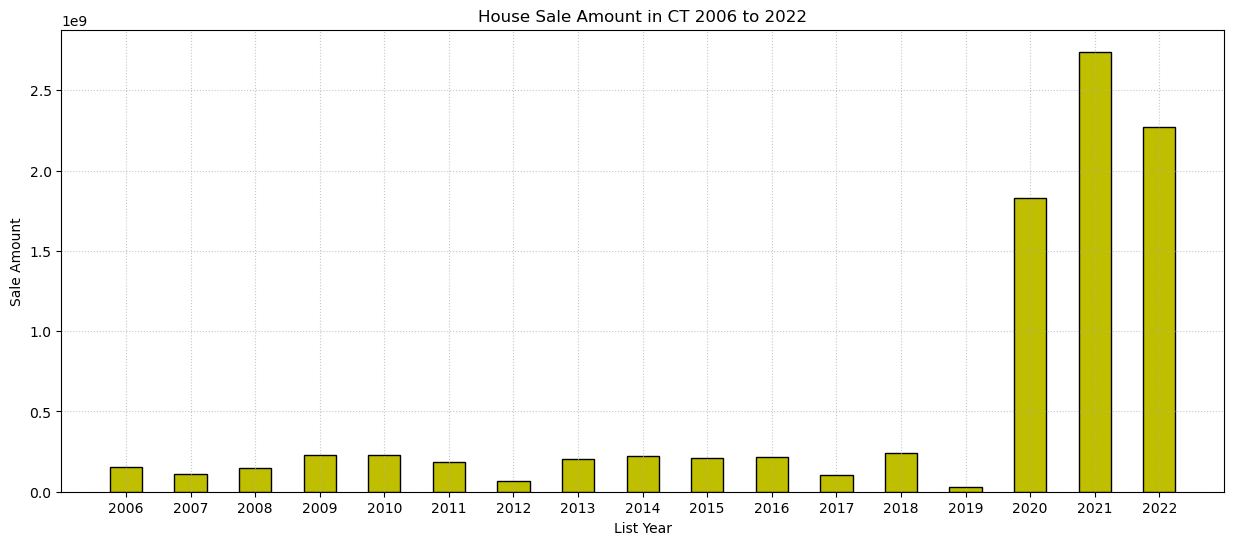

In [15]:
#Analysis by year w/ graph

fig = plt.figure(figsize=(15,6))
x = rs_data_res_type.index
y = rs_data_res_type

bar_width = 0.5
edgecolor = 'black'

bars = plt.bar(x, y, bar_width, color="y", ec=edgecolor, lw=1)
plt.ylabel('Sale Amount')
plt.xlabel('List Year')
plt.title('House Sale Amount in CT 2006 to 2022') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2005, x.max()+1)
plt.xticks(x, rs_data_res_type.index)

for bar in bars:
        height = bar.get_height()

plt.show()

In [16]:
#Analysis:
#This dataset shows the total Sale Amount for different years in the housing market. Here's an analysis of the trends:

#2006 to 2019: Fluctuations
#The data from 2006 to 2019 shows significant fluctuations in the sale amounts:
#The highest values in this period were in 2009 ($228.9M), 2010 ($231.7M), and 2014 ($221.9M), indicating a strong housing market during these years.
#In 2012, there is a sharp decline, with the lowest value of $68.8M.
#There's a significant drop again in 2019, with sales down to just $32.2M, marking a potential downturn or slowdown.
#2020 and Onwards: Drastic Increase

#2020 to 2022: Peak of COVID-19 
#There is a massive surge in sales, reaching $1.83B, more than an eightfold increase from the previous years.
#This trend continues into 2021, with an even larger increase, reaching $2.74B.
#By 2022, the total sales amount decreased slightly to $2.27B, but it still remains significantly higher than any year prior to 2020.


#Key Observations:
#Prior 2020 (Pre-COVID-19): 
#The sales amounts show a relatively stable but fluctuating pattern, likely reflecting normal market cycles, economic conditions, and housing demand.

#2020-2022 (COVID-19): 
#The enormous increase starting in 2020 suggests a trend shift, influenced by the COVID-19 pandemic. 
#Housing markets in many regions saw massive demand spikes, high demand for space, and shifts in living preferences leading to sharp price increases.
#The continuing high values in 2021 and 2022 suggest that the effects were not just temporary but may have led to a sustained shift in the market.

In [17]:
#Find 6 towns in CT Bridgeport, Stamford, New Haven, Hartford, and Waterbury

In [18]:
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors = 'coerce')
rs_data_res_sale = rs_data_df.groupby('Town')['Sale Amount'].sum()
rs_data_res_sale

Town
Bridgeport    1445758040
Hartford       489947393
New Haven     1052929361
Stamford      5024249996
Waterbury     1190423658
Name: Sale Amount, dtype: int64

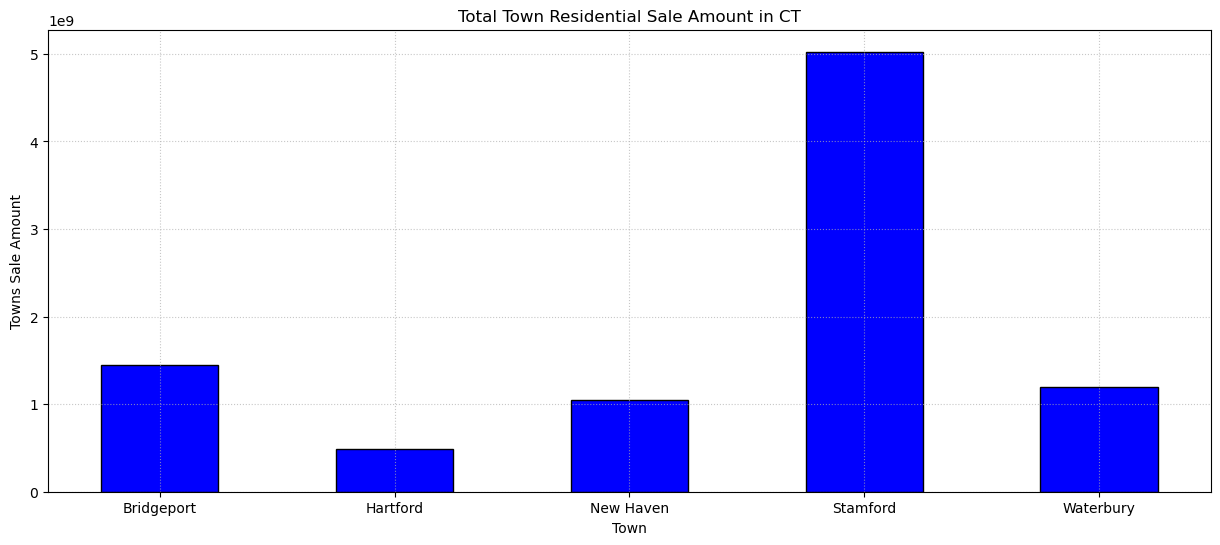

In [19]:
#bar plot
fig = plt.figure(figsize=(15,6))
x = rs_data_res_sale.index
y = rs_data_res_sale

bar_width = 0.5
edgecolor = 'black'

bars = plt.bar(x, y, bar_width, color="b", ec=edgecolor, lw=1)
plt.ylabel('Towns Sale Amount')
plt.xlabel('Town')
plt.title('Total Town Residential Sale Amount in CT') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xticks(x, rs_data_res_sale.index)

for bar in bars:
        height = bar.get_height()

plt.show()

In [20]:
# Analysis:
# Stamford is the clear leader, with significantly higher property sales, likely due to high demand and market economics.
# Bridgeport, New Haven, and Waterbury show moderately strong markets, each exceeding $1 billion in sales.
# Hartford lags behind with less than half a billion in sales, possibly reflecting different market dynamics.

In [21]:
# Convert 'Sale Amount' to numeric (already done)
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors='coerce')

# Group by 'Town' to calculate both the sum of sales and the count of property sales
rs_data_res_sale = rs_data_df.groupby('Town').agg(
    Total_Sale_Amount=('Sale Amount', 'sum'),
    Property_Sales_Count=('Sale Amount', 'count')
)

# Display the result
rs_data_res_sale


,Total_Sale_Amount,Property_Sales_Count
Town,,
Bridgeport,1445758040,6267
Hartford,489947393,2514
New Haven,1052929361,4033
Stamford,5024249996,6988
Waterbury,1190423658,7231


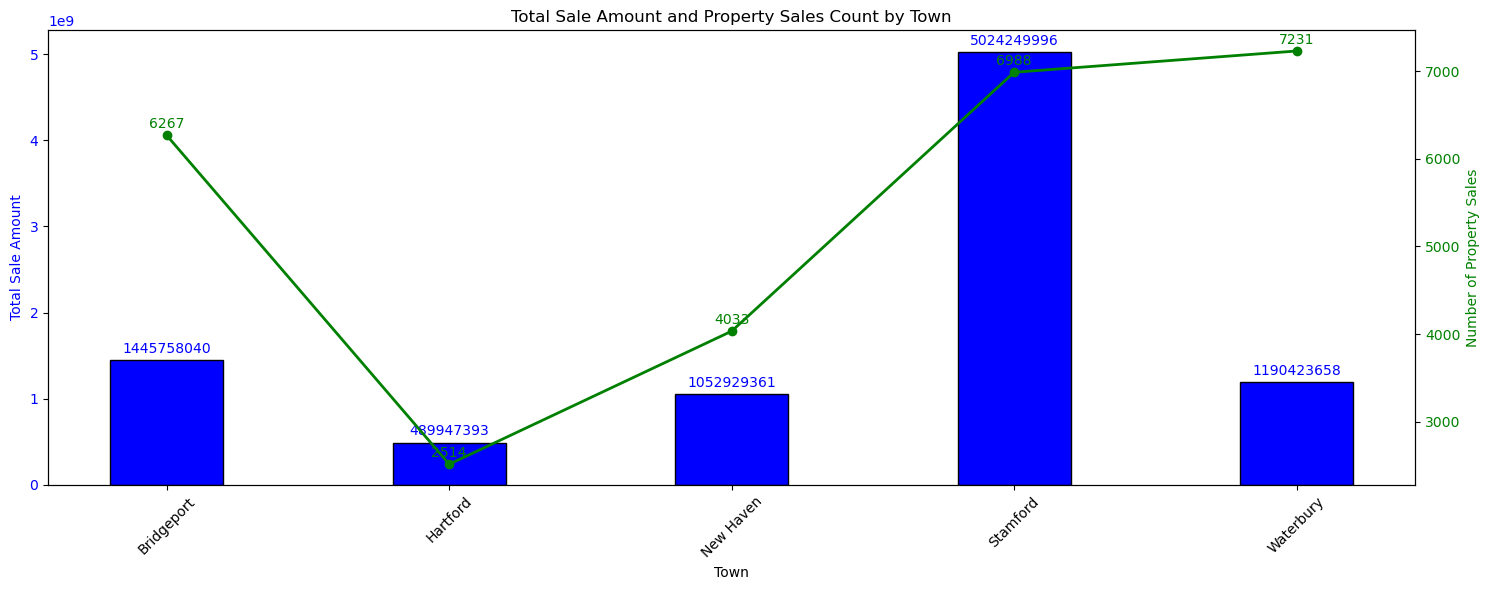

In [22]:
# Assuming rs_data_res_sale already includes 'Total_Sale_Amount' and 'Property_Sales_Count'

fig, ax1 = plt.subplots(figsize=(15, 6))

# Data preparation
x = np.arange(len(rs_data_res_sale))  # the label locations
y1 = rs_data_res_sale['Total_Sale_Amount']  # Total Sale Amount
y2 = rs_data_res_sale['Property_Sales_Count']  # Property Sales Count

# Bar chart for Total Sale Amount
bar_width = 0.4
bars = ax1.bar(x, y1, bar_width, label='Total Sale Amount', color="b", edgecolor='black')

# Setting up the first y-axis for Sale Amount
ax1.set_xlabel('Town')
ax1.set_ylabel('Total Sale Amount', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(rs_data_res_sale.index, rotation=45)
ax1.tick_params(axis='y', labelcolor='b')

# Adding data labels for the Sale Amount bars
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='b')

# Secondary y-axis for Property Sales Count
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Property Sales', color='g')
ax2.plot(x, y2, label='Property Sales Count', color='g', marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor='g')

# Adding data labels for the line chart
for i, count in enumerate(y2):
    ax2.annotate(f'{int(count)}',
                 xy=(x[i], count),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', color='g')

# Title and grid
plt.title('Total Sale Amount and Property Sales Count by Town')

# Show plot
plt.tight_layout()
plt.show()


In [23]:
# Analysis:
# Stamford 
# It not only has high volume of transactions but also potentially higher property value. 
# It likely represents a more affluent area or one with significant high-value residential properties.

# Waterbury
# despite having the highest property sales count (7231), it has a lower total sale amount of $1.19 billion compared to Stamford.
# It likely represents that it has the lowest mean property prices.

# Hartford 
# despite being the state capital, has the lowest sales amount ($489.95 million) and fewest property sales (4033).
# It likely indicates potentially less demand or lower housing activity compared to the other towns.

# Waterbury and Bridgeport 
# They have more transactions but at lower price points.

In [24]:
# Statistical Analysis for Assessed value

mean = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).mean()
median = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).median()
var = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).var()
std = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).std()
sem = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).sem()


sum_stat_av = pd.DataFrame({"Mean Assessed Value ":mean, 
                            "Median Assessed Value":median, 
                           "Assessed Value Variance":var, 
                           "Assessed Value Std. Dev.":std, 
                           "Assessed Value Std. Err.":sem,
                           })

sum_stat_av

,Mean Assessed Value,Median Assessed Value,Assessed Value Variance,Assessed Value Std. Dev.,Assessed Value Std. Err.
Town,,,,,
Bridgeport,145145.825914,134790.0,4.679999e+10,216333.044358,2732.706656
Hartford,67294.117741,51779.5,2.978798e+10,172591.960610,3442.214468
New Haven,160393.512274,137865.0,1.180524e+10,108651.942222,1710.895102
Stamford,359877.820120,313380.0,6.674562e+10,258351.746131,3090.544157
Waterbury,82585.781496,77460.0,2.357576e+09,48554.877946,570.996815


In [25]:
# Statistical Analysis for Sale Amount value

mean = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).mean()
median = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).median()
var = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).var()
std = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).std()
sem = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).sem()

sum_stat_sv = pd.DataFrame({"Mean Sale ":mean, 
                            "Median Mean Sale ":median, 
                           "Sale Amount Variance":var, 
                           "Sale Amount Std. Dev.":std, 
                           "Sale Amount":sem})

sum_stat_sv

,Mean Sale,Median Mean Sale,Sale Amount Variance,Sale Amount Std. Dev.,Sale Amount
Town,,,,,
Bridgeport,230693.799266,210000.0,3.780779e+10,1.944422e+05,2456.183389
Hartford,194887.586714,157000.0,9.037767e+10,3.006288e+05,5995.810890
New Haven,261078.443094,226000.0,3.949249e+10,1.987272e+05,3129.270949
Stamford,718982.540927,505000.0,8.979480e+12,2.996578e+06,35846.696963
Waterbury,164627.805006,155000.0,1.206803e+10,1.098546e+05,1291.870814


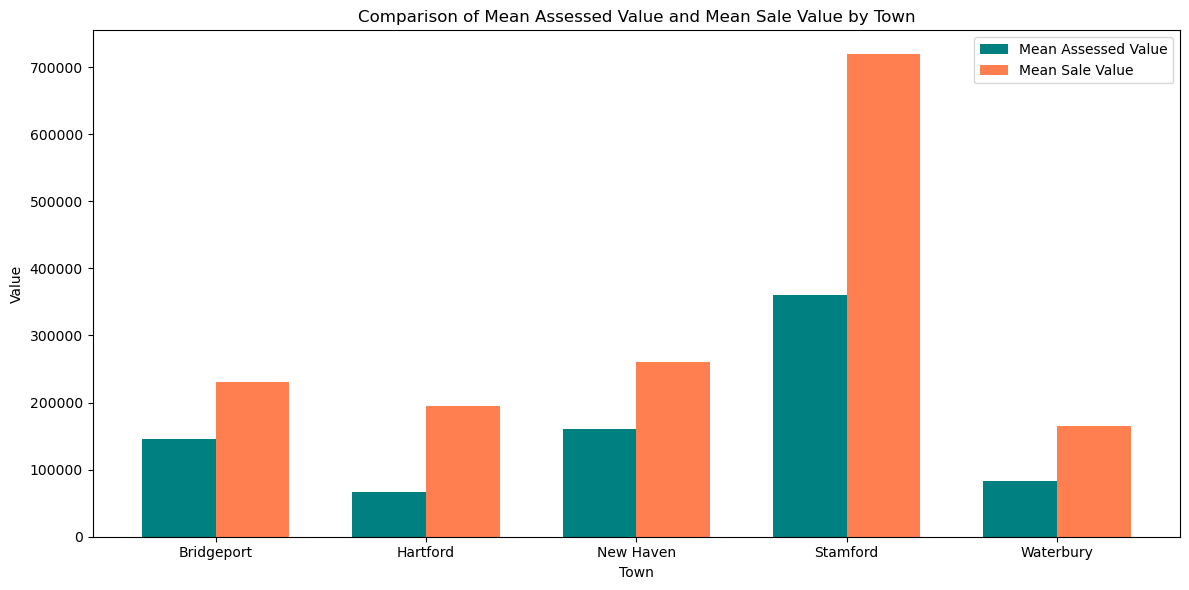

In [26]:
# Merge the two dataframes on the 'Town' index
merged_df = pd.merge(sum_stat_av, sum_stat_sv, left_index=True, right_index=True, suffixes=('_assessed', '_sale'))

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Defining the bar width
bar_width = 0.35

# Create a range for the x-axis
towns = np.arange(len(merged_df))

# Plotting the bars
ax.bar(towns - bar_width/2, merged_df['Mean Assessed Value '], width=bar_width, label='Mean Assessed Value', color='teal')
ax.bar(towns + bar_width/2, merged_df['Mean Sale '], width=bar_width, label='Mean Sale Value', color='coral')

# Add labels and title
ax.set_xlabel('Town')
ax.set_ylabel('Value')
ax.set_title('Comparison of Mean Assessed Value and Mean Sale Value by Town')
ax.set_xticks(towns)
ax.set_xticklabels(merged_df.index, rotation=0)

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
# Create a DataFrame with Mean Assessed Value and Mean Sale Value for each town
data = {
    'Town': ['Bridgeport', 'Hartford', 'New Haven', 'Stamford', 'Waterbury'],
    'Mean Assessed Value': [145145.82, 67294.11, 160393.51, 359877.82, 82585.78],
    'Mean Sale Value': [230693.79, 194887.58, 261078.44, 718982.54, 164627.80]
}

df = pd.DataFrame(data)

# Calculate the difference (Mean Sale Value - Mean Assessed Value)
df['Sale - Assessed Difference'] = df['Mean Sale Value'] - df['Mean Assessed Value']

# Display the DataFrame with the calculated difference
print(df)


         Town  Mean Assessed Value  Mean Sale Value  \
0  Bridgeport            145145.82        230693.79   
1    Hartford             67294.11        194887.58   
2   New Haven            160393.51        261078.44   
3    Stamford            359877.82        718982.54   
4   Waterbury             82585.78        164627.80   

   Sale - Assessed Difference  
0                    85547.97  
1                   127593.47  
2                   100684.93  
3                   359104.72  
4                    82042.02  


In [28]:
# Analysis

#Bridgeport:
#Difference (Sale - Assessed): $85,548
#The mean sale price is significantly higher than the assessed value, indicating that properties are selling for much more than their tax-assessed values.

#Hartford:
#Difference (Sale - Assessed): $127,594
#The mean sale value is almost three times the assessed value, suggesting a substantial underestimation of property values by the local government.

#New Haven:
#Difference (Sale - Assessed): $100,685
#New Haven's mean sale value is about 1.6 times the assessed value, indicating that properties tend to sell for much more than their assessed value.

#Stamford:
#Difference (Sale - Assessed): $359,105
#Stamford stands out with a mean sale value that's double the assessed value. This reflects a significant gap between assessed and market values, with Stamford properties fetching far higher prices.

#Waterbury:
#Difference (Sale - Assessed): $82,042
#Waterbury follows a similar pattern, with the mean sale value being double the assessed value.

In [29]:
# Coordinates of Towns- Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"
coordinates = {
    'Longitude': [-73.195557, -73.538734, -72.929916, -72.685097, -73.04138],
    'Latitude': [41.186390, 41.053429, 41.310726, 41.763710, 41.556110],
    'Towns': ["Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"],
    'Average Sale Amount':mean}

In [30]:
coordinates_df = pd.DataFrame(coordinates)
coordinates_df

,Longitude,Latitude,Towns,Average Sale Amount
Town,,,,
Bridgeport,-73.195557,41.186390,Bridgeport,230693.799266
Hartford,-73.538734,41.053429,Stamford,194887.586714
New Haven,-72.929916,41.310726,New Haven,261078.443094
Stamford,-72.685097,41.763710,Hartford,718982.540927
Waterbury,-73.041380,41.556110,Waterbury,164627.805006


In [31]:
# Geographical scatter plot 

map_plot_1 = coordinates_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo= True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 600,
    scale = 0.1,
    color = "Towns",
    size = "Average Sale Amount",
    alpha = 0.55
)
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Towns,Average Sale Amount)

Slope (m): 21160.44
Y-intercept (b): -42237134.07


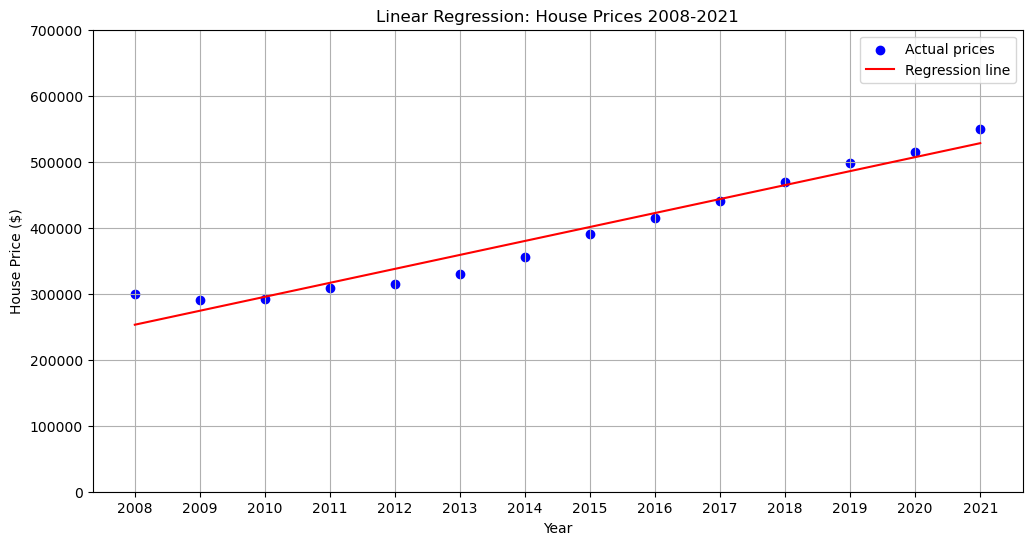

Predicted price for 2022: $549274.73


In [32]:
# Sample data
years = np.array(range(2008, 2022))  # Years from 2008 to 2021
prices = np.array([
    300000, 290000, 292000, 308000, 315000, 330000, 355000, 
    390000, 415000, 440000, 470000, 498000, 515000, 550000
])  # Sample house prices

# Calculate slope (m) and y-intercept (b)
n = len(years)
m = (n * np.sum(years * prices) - np.sum(years) * np.sum(prices)) / (n * np.sum(years**2) - np.sum(years)**2)
b = (np.sum(prices) - m * np.sum(years)) / n

# Print results
print(f"Slope (m): {m:.2f}")
print(f"Y-intercept (b): {b:.2f}")

# Predict prices
prices_pred = m * years + b

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(years, prices, color='blue', label='Actual prices')
plt.plot(years, prices_pred, color='red', label='Regression line')
plt.xlabel('Year')
plt.ylabel('House Price ($)')
plt.title('Linear Regression: House Prices 2008-2021')
plt.legend()

# Set y-axis limit to 700,000
plt.ylim(0, 700000)

# Set x-axis ticks to show all years
plt.xticks(years)

plt.grid(True)
plt.show()

# Predict price for 2022
predicted_price_2022 = m * 2022 + b
print(f"Predicted price for 2022: ${predicted_price_2022:.2f}")

In [33]:
#Visualize data/trend for house price

In [34]:
#Analysis and comments/insights